In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import jsonlines

In [2]:
x_s = {}
y_s = {}
with jsonlines.open('result.jsonl') as reader:
    for obj in reader:
        if 'group_name' in obj:
            continue
        id, rort, x = obj['id'].split('/')
        if id not in x_s:
            x_s[id] = {"recognizer": [], "translator": []}
            y_s[id] = {"recognizer": [], "translator": []}
        x_s[id][rort].append(int(x))
        y_s[id][rort].append(obj['mean']['estimate'] / 1000000)

generation_x = []
generation_y = []
with jsonlines.open('generation.jsonl') as reader:
    for obj in reader:
        if 'group_name' in obj:
            continue
        _, x = obj['id'].split('/')
        generation_x.append(int(x))
        generation_y.append(obj['mean']['estimate'] / 1000000)


## Benches

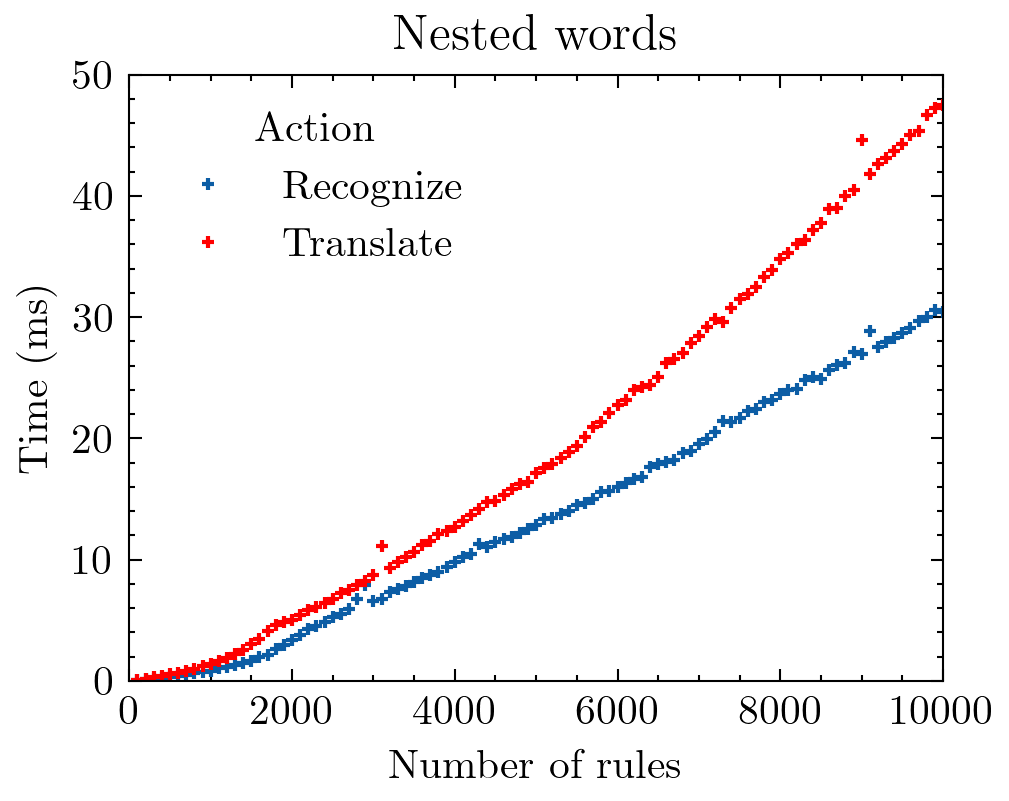

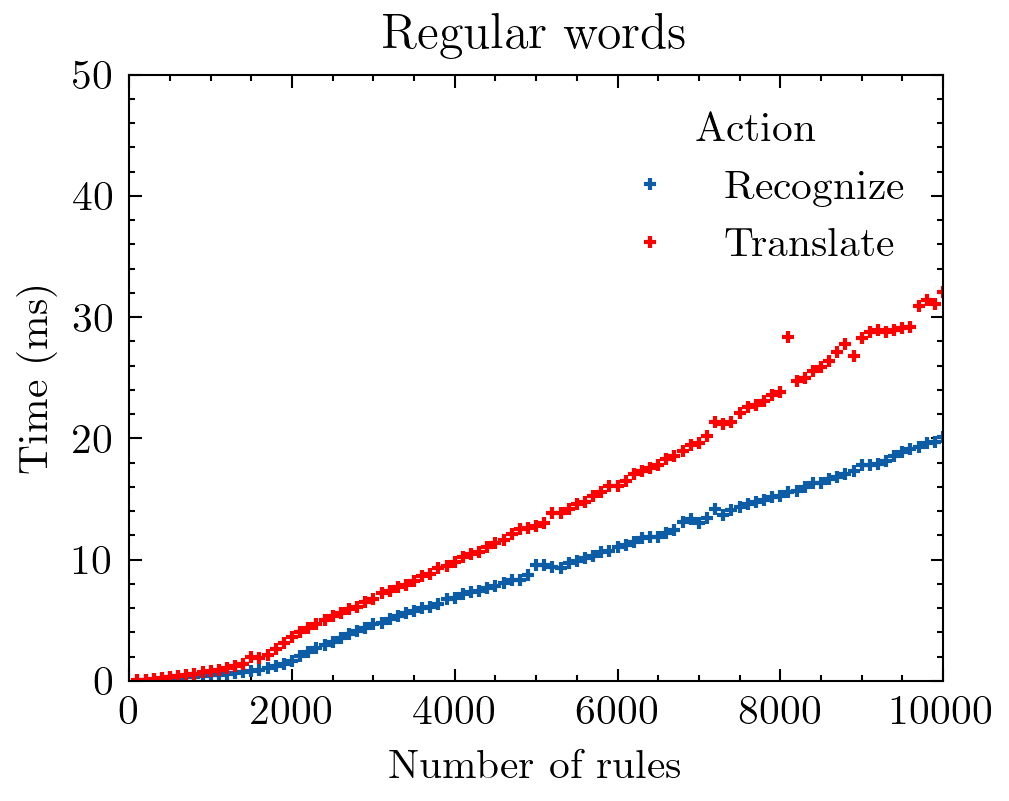

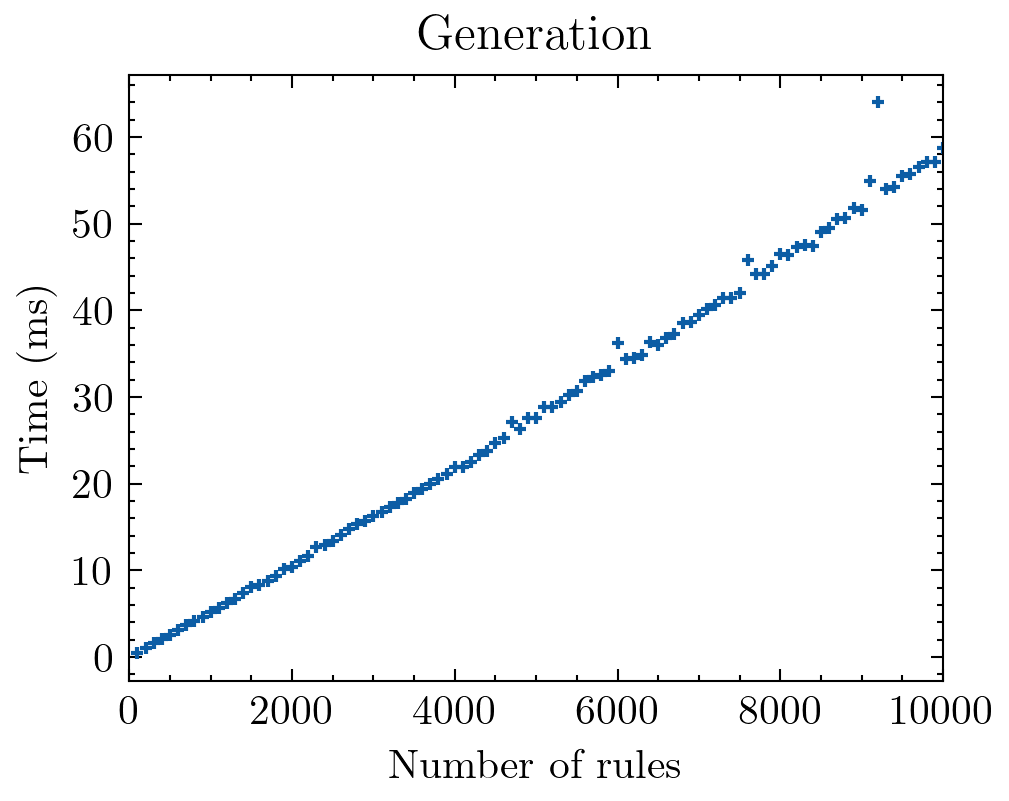

In [3]:
plt.style.use(['science', 'scatter'])

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

for key in x_s:
    fig, ax = plt.subplots()

    ax.plot(x_s[key]["recognizer"], y_s[key]["recognizer"], linewidth=2.0, marker='+', label="Recognize")
    ax.plot(x_s[key]["translator"], y_s[key]["translator"], linewidth=2.0, marker='+', color='red', label="Translate")
    ax.legend(title="Action")
    ax.set_xlabel('Number of rules')
    ax.set_ylabel('Time (ms)')
    ax.set_title(key)
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 50)

fig, ax = plt.subplots()

ax.plot(generation_x, generation_y, linewidth=2.0, marker='+')
ax.set_xlabel('Number of rules')
ax.set_title("Generation")
ax.set_ylabel('Time (ms)')
ax.set_xlim(0, 10000)




plt.show()